Data Diri :
---
Nama : Daniel Mahardika Y  
Email : daniel.mahardikay@gmail.com  
Kota : Semarang

In [1]:
#cbeck version tensorflow
import tensorflow as tf 
print(tf.__version__)

2.3.0


In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-31 18:36:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.55MB/s    in 53s     

2020-10-31 18:37:27 (5.85 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os

# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
print(os.listdir(base_dir))
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')

train_rock=os.path.join(train_dir,'rock')
train_paper=os.path.join(train_dir,'paper')
train_scissors=os.path.join(train_dir,'scissors')
val_rock=os.path.join(val_dir,'rock')
val_paper=os.path.join(val_dir,'paper')
val_scissors=os.path.join(val_dir,'scissors')

os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']


In [4]:
from sklearn.model_selection import train_test_split

rock_dir=os.path.join(base_dir,'rock')
paper_dir=os.path.join(base_dir,'paper')
paper_dir=os.path.join(base_dir,'paper')
scissors_dir=os.path.join(base_dir,'scissors')

train_rock_dir,val_rock_dir= train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir= train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors_dir, val_scissors_dir= train_test_split(os.listdir(scissors_dir), test_size=0.4)

print('total rock',len(os.listdir(rock_dir)))
print('total paper',len(os.listdir(paper_dir)))
print('total scissors',len(os.listdir(scissors_dir)),'\n')

print('train rock',len(train_rock_dir))
print('val rock',len(val_rock_dir),'\n')

print('train paper',len(train_paper_dir))
print('val paper',len(val_paper_dir),'\n')

print('train scissors',len(train_scissors_dir))
print('val scissors',len(val_scissors_dir))

total rock 726
total paper 712
total scissors 750 

train rock 435
val rock 291 

train paper 427
val paper 285 

train scissors 450
val scissors 300


In [5]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [7]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),
                  batch_size = 4,
                  class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
                  val_dir,
                  target_size = (150,150),
                  batch_size = 4,
                  class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

In [10]:
model.fit(train_generator,
  steps_per_epoch = 25,
  epochs = 25,
  validation_data = validation_generator,
  validation_steps = 5,
  verbose = 2
)

Epoch 1/25
25/25 - 13s - loss: 1.3475 - accuracy: 0.3300 - val_loss: 1.0948 - val_accuracy: 0.3500
Epoch 2/25
25/25 - 13s - loss: 1.1114 - accuracy: 0.3300 - val_loss: 1.0943 - val_accuracy: 0.5000
Epoch 3/25
25/25 - 13s - loss: 1.0716 - accuracy: 0.4400 - val_loss: 1.0533 - val_accuracy: 0.4500
Epoch 4/25
25/25 - 13s - loss: 1.0724 - accuracy: 0.4000 - val_loss: 1.0321 - val_accuracy: 0.4500
Epoch 5/25
25/25 - 13s - loss: 1.0445 - accuracy: 0.5100 - val_loss: 1.0128 - val_accuracy: 0.4000
Epoch 6/25
25/25 - 12s - loss: 0.8190 - accuracy: 0.6800 - val_loss: 0.9022 - val_accuracy: 0.6500
Epoch 7/25
25/25 - 13s - loss: 0.7460 - accuracy: 0.6700 - val_loss: 0.7400 - val_accuracy: 0.7500
Epoch 8/25
25/25 - 13s - loss: 0.6660 - accuracy: 0.7400 - val_loss: 0.9803 - val_accuracy: 0.5000
Epoch 9/25
25/25 - 13s - loss: 0.6354 - accuracy: 0.7300 - val_loss: 0.3876 - val_accuracy: 0.8000
Epoch 10/25
25/25 - 13s - loss: 0.4500 - accuracy: 0.8500 - val_loss: 0.2083 - val_accuracy: 0.9500
Epoch 11/

Saving 2M8LvUBGMOH1bsaz.png to 2M8LvUBGMOH1bsaz.png
2M8LvUBGMOH1bsaz.png
[0. 0. 1.]
scissors


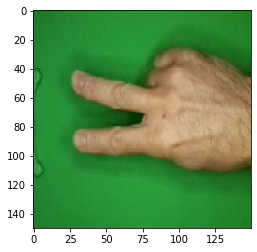

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes[0])
  if str(classes[0])=="[0. 1. 0.]":
    print('rock')
  elif str(classes[0])=="[1. 0. 0.]":
    print('paper')
  else:
    print('scissors')